In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from skimage.transform import resize, rescale
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from matplotlib import pyplot
import tensorflow as tf
import numpy as np
np.random.seed(0)
import re
import os
import cv2
import matplotlib.image as mpimg
from matplotlib.pyplot import imsave
import matplotlib.image as mpimg

In [2]:
import re
from skimage import img_as_ubyte
import imageio
import time as time
import math

In [3]:
autoencoder_bilinear = tf.keras.models.load_model('/content/drive/MyDrive/Master_Thesis/Autoencoder/Autoencoder_Subpixel_x2/Autoencoder_subpixel_x2.h5')

In [ ]:
autoencoder_bilinear.summary()

In [5]:
def checkSize(height):
    if (height % 2) == 0:
        #print("{0} is Even".format(height))
        height=int(height/2)
        if (height % 2) == 0:
            #print("{0} is Even".format(height))
            height=int(height/2)
            if (height % 2) == 0:
               # print("{0} is Even".format(height))
                return True
            else:
               # print("{0} is Odd".format(height))
                return False
        else:
           # print("{0} is Odd".format(height))
            return False
    else:
        #print("{0} is Odd".format(height))
        return False
    return False

In [6]:
def paddingHeight(img, H, W, C):

    zimg = np.zeros((H+1, W, C))
    zimg[:H, :W, :C] = img

    # Pad the first/last two col and row
    zimg[H:H+1, :W, :] = img[H-1:H , :W, :]
    return zimg

In [7]:
def paddingWidth(img, H, W, C):

    zimg = np.zeros((H, W+1, C))
    zimg[:H ,:W, :C] = img
    # Pad the first/last two col and row
    zimg[ :H,W:W+1, :] = img[ :H,W-1:W , :]

    return zimg

In [8]:
def deletepadding(image,padding_width,padding_height):
    global Img
    if(padding_width ==0):
        if(padding_height ==0):
            Img=image
            return Img
        elsea:
            Img=image[:image.shape[0]-padding_height,:image.shape[1],:image.shape[2]]

            return Img
    else:
        imageRemoveWidth=image[:image.shape[0] ,:image.shape[1]-padding_width,:image.shape[2]]
        deletepadding(imageRemoveWidth,0,padding_height)

    return Img

In [9]:
def testSize(imagelow,height, width, channels):
    #sr1=[]padding_height
    if( checkSize(height)):
        if( checkSize(width)):
            image= imagelow.astype(np.float32)/255
            image=[image]
            image=np.array(image)
            global sr1
            print("********************************************************")
            print(str(os.path.splitext(os.path.basename(os.path.normpath(filepath)))[0]))
            t0= time.time()
            sr1 = np.clip(autoencoder_bilinear.predict(image), 0.0, 1.0)
            t1 = time.time() - t0
            print("Time elapsed: ", t1)
            print("********************************************************")

        else:
            image=paddingWidth(imagelow,height, width, channels)
            global padding_width
            padding_width =padding_width+1
            height, width, channels = image.shape
            testSize(image,height, width, channels)
    else:
        image=paddingHeight(imagelow,height, width, channels)
        global padding_height
        padding_height=padding_height+1
        height, width, channels = image.shape
        x=testSize(image,height, width, channels)

    return sr1,padding_width,padding_height

In [10]:
def psnr(img1, img2):
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation=cv2.INTER_AREA)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [11]:
from PIL import Image
import numpy as np

def crop_image(image, crop_coords):
    """
    Crop an image based on the provided coordinates and return the cropped image.
    :param image: NumPy array or PIL Image object representing the input image.
    :param crop_coords: Tuple (left, upper, right, lower) specifying the crop coordinates.
    :return: Cropped image as a NumPy array or PIL Image object.
    """
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    cropped_image = image.crop(crop_coords)
    return cropped_image

In [12]:
input_folder = "/content/drive/MyDrive/Master_Thesis/DATASET/test_dataset/Set5/LRbicx2"
output_folder = "/content/drive/MyDrive/Master_Thesis/Models/Results/aessr_x2/set5/"

for root, dirnames, filenames in os.walk(input_folder):
    for i, filename in enumerate(filenames):

      if re.search("\.(jpg|jpeg|JPEG|png|bmp|tiff)$", filename):

          filepath = os.path.join(root, filename)
          file_name, file_extension = os.path.splitext(filename)
          image=cv2.imread(filepath)
          imagelow = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          height, width, channels = imagelow.shape
          padding_width=0
          padding_height=0
          j = i +1
          Imagetest,padding_width,padding_height =testSize(imagelow,height, width, channels)

          yimage=deletepadding(Imagetest[0],padding_width*2,padding_height*2)


      imageio.imwrite(output_folder +file_name + '.png',img_as_ubyte(yimage))


********************************************************
bird
1/1 [==============================] - 1s 953ms/step
Time elapsed:  1.0392041206359863
********************************************************
********************************************************
butterfly
1/1 [==============================] - 1s 637ms/step
Time elapsed:  0.6925790309906006
********************************************************
********************************************************
head
1/1 [==============================] - 0s 450ms/step
Time elapsed:  0.5000839233398438
********************************************************
********************************************************
woman
1/1 [==============================] - 1s 508ms/step
Time elapsed:  0.6917018890380859
********************************************************
********************************************************
baby
1/1 [==============================] - 3s 3s/step
Time elapsed:  2.663194179534912
*************************

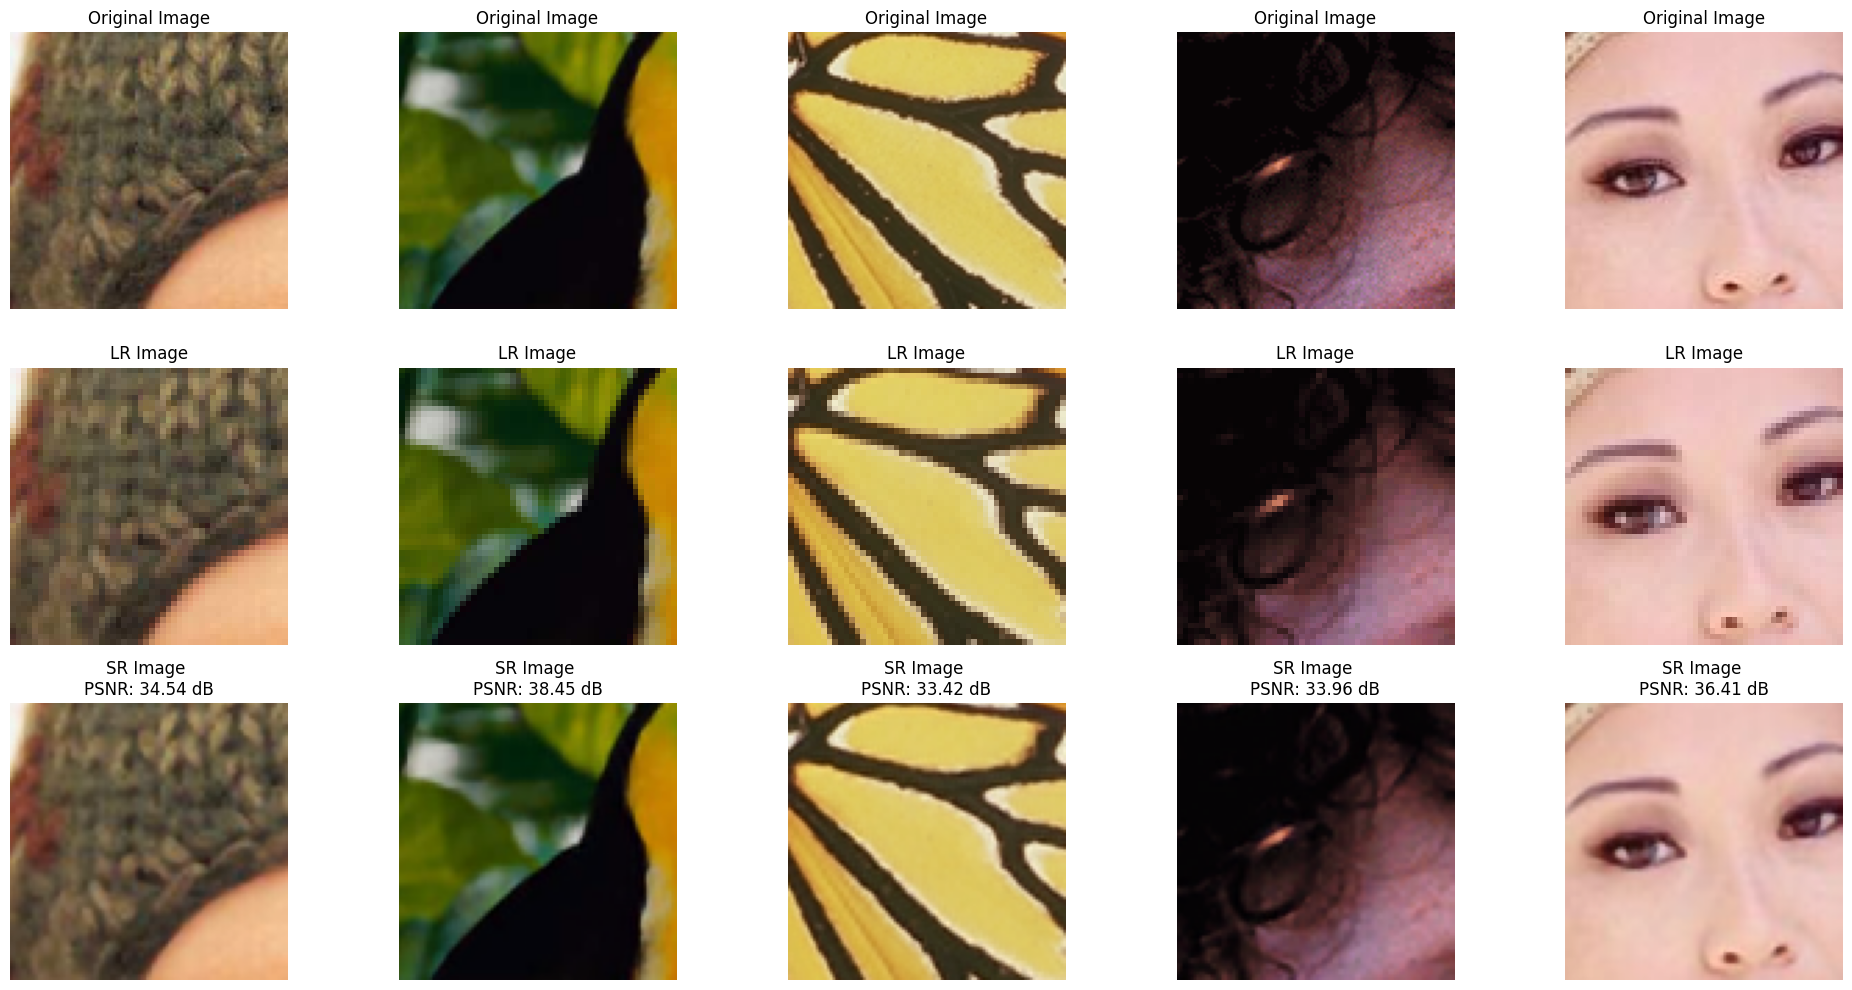

In [ ]:
lr_crop_coords = (25, 25, 75, 75)
SR_HR_coords = (50, 50, 150, 150)
import cv2
import matplotlib.pyplot as plt

original_folder = "/content/drive/MyDrive/Master_Thesis/DATASET/test_dataset/Set5/original/"

# Get the list of image files in the folders
input_files = os.listdir(input_folder)
original_files = os.listdir(original_folder)
model_pred_files = os.listdir(output_folder)

# Sort the files to ensure consistent order
input_files.sort()
original_files.sort()
model_pred_files.sort()

# Select only the first 5 images
input_files = input_files[:5]
original_files = original_files[:5]
model_pred_files = model_pred_files[1:]

# Create subplots with 1 row and 5 columns
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

# Loop over the images and plot them
for i in range(5):
    # Read the LR and HR images
    lr_img = cv2.imread(os.path.join(input_folder, input_files[i]))
    og_img = cv2.imread(os.path.join(original_folder, original_files[i]))
    sr_img = cv2.imread(os.path.join(output_folder, model_pred_files[i]))

    # Convert BGR to RGB for plotting
    lr_img = cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB)
    og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)
    sr_img = cv2.cvtColor(sr_img, cv2.COLOR_BGR2RGB)

    #Crop Images
    lr_img = crop_image(lr_img, lr_crop_coords)
    og_img = crop_image(og_img, SR_HR_coords)
    sr_img = crop_image(sr_img,SR_HR_coords)

    calculate_psnr = psnr(np.array(og_img),np.array(sr_img))

    # Plot the LR image
    axes[0, i].imshow(og_img)
    axes[0, i].set_title("Original Image")
    axes[0, i].axis("off")

    # Plot the HR image
    axes[1, i].imshow(lr_img)
    axes[1, i].set_title("LR Image")
    axes[1, i].axis("off")

    # Plot the HR image
    axes[2, i].imshow(sr_img)
    axes[2, i].set_title(f"SR Image \nPSNR: {calculate_psnr:.2f} dB") #f"SR Image \nPSNR: {calculate_psnr:.2f} dB"
    axes[2, i].axis("off")

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Master_Thesis/Autoencoder/Results/x2/set5/Autoencoder_Set5_x2_plot.png')
